In [10]:
#READ DATA FROM PREPROCESSED FILE
import pandas as pd
#CHANGE THE PATH TO THE FOLDER WHERE YOU STORE DATA
df_new = pd.read_csv('/Users/phuong/Documents/DDI_Evidence_Classification/Data/processed_Training_Papers.csv',encoding ='latin1')

df_old = pd.read_csv('/Users/phuong/Documents/DDI_Evidence_Classification/Data/Training_Papers.csv',encoding ='latin1')
df_old.head()

df = pd.merge(df_new, df_old, on='PMID')
df = df[['PMID','Article Title_x','Abstract_x','PMCID','First Label','Second Label',"Third Label"]]

df.rename(columns = {'Article Title_x':'Article Title'}, inplace = True) 
df.rename(columns = {'Abstract_x':'Abstract'}, inplace = True) 
df.rename(columns = {'PMCID':'Methods Section'}, inplace = True) 

df.head()

,PMID,Article Title,Abstract,Methods Section,First Label,Second Label,Third Label
0,8646822,A kinetic and dynamic study of drug drug with ...,To assess the possible involvement of CYPnumbe...,methods subjects twelve unrelated healthy male...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial
1,8453848,A potentially hazardous interaction between dr...,Interaction between drug and drug was investig...,material and methods study design orally admin...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial
2,23210726,A semi-mechanistic absorption model to evaluat...,The aim of this study was to develop a PK/PD m...,methods drug healthy male volunteers randomize...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial
3,11936570,A study of the interaction potential of azithr...,drug is a common option among the drug-CoA red...,materials and methods this randomized open lab...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial
4,1387301,Absolute bioavailability of drug after drug ad...,"The absolute bioavailability of drug, a new dr...",drug new drug membered drug drug agent exhibit...,PK Trial,Non-polymorphic enzyme/transport PK Trial,Non-polymorphic enzyme/transport PK Trial


In [11]:
#GENERATED LABELS FOR THE DATA
from io import StringIO

col = ['Article Title','Abstract','Methods Section','First Label','Second Label',"Third Label"]
df = df[col]

#generate categorize_id level 1 based on First Label
df.columns = ['Article Title','Abstract','Methods Section','First Label','Second Label',"Third Label"]
df['category_id_1'] = df['First Label'].factorize()[0]
category_id_df = df[['First Label', 'category_id_1']].drop_duplicates().sort_values('category_id_1')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id_1', 'First Label']].values)

#generate categorize_id level 2 based on Second Label
df['category_id_2'] = df['Second Label'].factorize()[0]
category_id_df_2 = df[['Second Label', 'category_id_2']].drop_duplicates().sort_values('category_id_2')
category_to_id_2 = dict(category_id_df_2.values)
id_to_category_2 = dict(category_id_df_2[['category_id_2', 'Second Label']].values)

#generate categorize_id level 3 based on Second Label
df['category_id_3'] = df['Third Label'].factorize()[0]
category_id_df_3 = df[['Third Label', 'category_id_3']].drop_duplicates().sort_values('category_id_3')
category_to_id_3 = dict(category_id_df_3.values)
id_to_category_3 = dict(category_id_df_3[['category_id_3', 'Third Label']].values)

df.head(100)

,Article Title,Abstract,Methods Section,First Label,Second Label,Third Label,category_id_1,category_id_2,category_id_3
0,A kinetic and dynamic study of drug drug with ...,To assess the possible involvement of CYPnumbe...,methods subjects twelve unrelated healthy male...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
1,A potentially hazardous interaction between dr...,Interaction between drug and drug was investig...,material and methods study design orally admin...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
2,A semi-mechanistic absorption model to evaluat...,The aim of this study was to develop a PK/PD m...,methods drug healthy male volunteers randomize...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
3,A study of the interaction potential of azithr...,drug is a common option among the drug-CoA red...,materials and methods this randomized open lab...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
4,Absolute bioavailability of drug after drug ad...,"The absolute bioavailability of drug, a new dr...",drug new drug membered drug drug agent exhibit...,PK Trial,Non-polymorphic enzyme/transport PK Trial,Non-polymorphic enzyme/transport PK Trial,1,1,1
5,Absolute bioavailability of drug immediate and...,The present study was conducted with the aim o...,materials methods the study performed accordan...,PK Trial,Non-polymorphic enzyme/transport PK Trial,Non-polymorphic enzyme/transport PK Trial,1,1,1
6,Absolute drug bioavailability of drug in healt...,drug is a number-hydroxy-number-methylglutaryl...,subjects and methods inclusion exclusion crite...,PK Trial,Non-polymorphic enzyme/transport PK Trial,Non-polymorphic enzyme/transport PK Trial,1,1,1
7,drug interacts with drug but not with drug dis...,The aim of this study was to determine the inf...,methods subjects twelve white occidental healt...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
8,An assessment of drug-drug interactions: the e...,A number of drug inhibit the activity of the d...,materials methods this single center randomize...,DDI Clinical Trial,RCT DDI Clinical Trial,RCT DDI Clinical Trial,0,0,0
9,Assessing the clinical significance of botanic...,drug-mediated modulation of drug Pnumber drug ...,methods study subjects the university of arkan...,DDI Clinical Trial,Non RCT Clinical Trial,Non-RCT non-parallel Clinical Trial,0,2,2


Accuracy: 0.8372093023255814
Precision: 0.7954643940488227
Recall: 0.8372093023255814
F1 score: 0.8126950568811033
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.57      0.80      0.67         5
           2       1.00      0.91      0.95        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         3

   micro avg       0.84      0.84      0.84        43
   macro avg       0.57      0.60      0.58        43
weighted avg       0.80      0.84      0.81        43



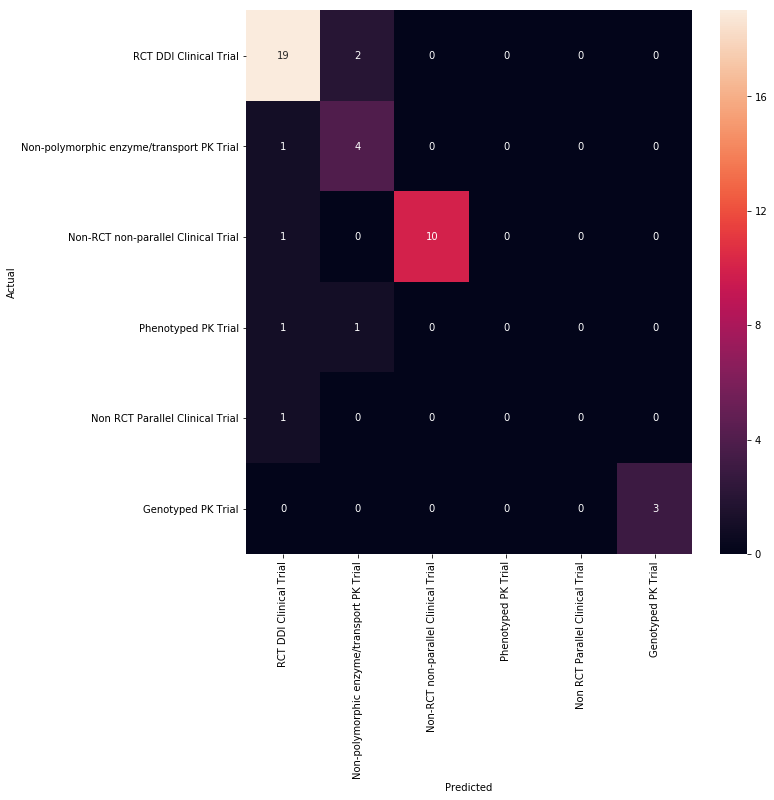

In [12]:
#MULTICLASS CLASSIFIER IMPLEMENTATION
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

# SVM Model with bigrams taken from Abstract, Article Title, & Methods Section text
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.utils import class_weight
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import defaultdict
import pickle
from sklearn.pipeline import Pipeline
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english', ignore_stopwords=False)

class StemmedCountVectorizer(CountVectorizer):    
    def __init__(self, stemmer, *args, **kwargs):
        super(StemmedCountVectorizer, self).__init__(*args, **kwargs)
        self.stemmer = stemmer
        
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (self.stemmer.stem(word) for word in analyzer(doc.replace('\n', ' ')))

###MAIN PROGRAM###
#put labels
labels_level_1 = df.category_id_1
labels_level_2 = df.category_id_2
labels_level_3 = df.category_id_3

#Get tfidf from Title. Abstract, Methods Section
text = df['Abstract'] + df['Article Title'] + df['Methods Section']
countvector = StemmedCountVectorizer(stemmer=stemmer, ngram_range=(1, 1))
features_fit = countvector.fit(text)
features = features_fit.transform(text)
labels = df.category_id_3
   
#Train multi-class SVM model 
X_train, X_test, y_train, y_test,  = train_test_split(features, labels_level_3, stratify = labels_level_3, test_size=0.2, random_state = 0)
model_multiclass = SVC(kernel='linear', class_weight='balanced')
clf_pipe_multiclass = Pipeline([('model', model_multiclass)])
clf_multiclass = clf_pipe_multiclass.fit(X_train, y_train)
predictions_multiclass = clf_multiclass.predict(X_test)

#Print Accurancy, ROC AUC, F1 Scores, Recall, Precision)
print ('Accuracy:', accuracy_score(y_test, predictions_multiclass))
print ('Precision:', precision_score(y_test, predictions_multiclass,average='weighted'))
print ('Recall:', recall_score(y_test, predictions_multiclass,average='weighted'))
print ('F1 score:', f1_score(y_test, predictions_multiclass,average='weighted'))
print (classification_report(y_test,predictions_multiclass))

conf_mat = confusion_matrix(y_test, predictions_multiclass)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df_3['Third Label'].values, yticklabels=category_id_df_3['Third Label'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
        
#CHANGE THE PATH TO THE FOLDER WHERE YOU STORE DATA
filename_multiclass_classifier = '/Users/phuong/Documents/JBI_paper/Models/model_multiclass_classifier.sav'
pickle.dump(clf_multiclass, open(filename_multiclass_classifier, 'wb'))

In [19]:
#EVALUATION OF MULTICLASS CLASSIFIER ON UNLABELED DATA
stemmer = SnowballStemmer('english', ignore_stopwords=False)

new_df = pd.read_csv('/Users/phuong/Documents/DDI_Evidence_Classification/Data/processed_HeldOut_Papers.csv',encoding ='latin1')
predictions = []
actual = []

for index, row in new_df.iterrows():
    final_prediction = ""
    result_level_1 = 10
    result_level_2 = 10
    result_level_3 = 10
    
    PMID = row['PMID']
    new_text = row['Article Title'] + row['Abstract'] + row['Methods Section']
    new_text=[new_text]    
    #multiclass classifier prediction
    new_features = countvector.transform(new_text)
    multiclass_model = pickle.load(open('/Users/phuong/Documents/JBI_paper/Models/model_multiclass_classifier.sav', 'rb'))
    mutlticlass_prediction = multiclass_model.predict(new_features)
    label = row["Actual Label Numeric"]
#     print (mutlticlass_prediction)
#     print (label)
    predictions.append(mutlticlass_prediction)
    actual.append(label)
    
#     if mutlticlass_prediction == 0:
#         print (str(PMID) + ": RCT DDI Clinical Trial")
#     elif mutlticlass_prediction == 1:
#         print (str(PMID) + ": Non-polymorphic enzyme/transport PK Trial")
#     elif mutlticlass_prediction == 2:
#         print (str(PMID) + ": Non-RCT non-parallel DDI Clinical Trial")
#     elif mutlticlass_prediction == 3:
#         print (str(PMID) + ": Phenotyped PK Trial")
#     elif mutlticlass_prediction == 4:
#         print (str(PMID) + ": Non-RCT parallel DDI Clinical Trial")
#     elif mutlticlass_prediction == 5:
#         print (str(PMID) + ": Genotype PK Trial")

print (classification_report(actual,predictions))
        

              precision    recall  f1-score   support

           0       0.33      0.43      0.38         7
           1       0.00      0.00      0.00         5
           2       0.75      0.46      0.57        13
           4       1.00      1.00      1.00         1
           5       0.36      0.83      0.50         6

   micro avg       0.47      0.47      0.47        32
   macro avg       0.49      0.54      0.49        32
weighted avg       0.48      0.47      0.44        32



In [20]:
#EVALUATION OF MULTICLASS CLASSIFIER ON UNLABELED DATA
stemmer = SnowballStemmer('english', ignore_stopwords=False)

new_df = pd.read_csv('/Users/phuong/Documents/DDI_Evidence_Classification/Data/processed_New_Papers_DifferentDrugs.csv',encoding ='latin1')

for index, row in new_df.iterrows():
    final_prediction = ""
    result_level_1 = 10
    result_level_2 = 10
    result_level_3 = 10
    
    PMID = row['PMID']
    new_text = row['Article Title'] + row['Abstract'] + row['Methods Section']
    new_text=[new_text]
    
    #multiclass classifier prediction
    new_features = countvector.transform(new_text)
    multiclass_model = pickle.load(open('/Users/phuong/Documents/JBI_paper/Models/model_multiclass_classifier.sav', 'rb'))
    mutlticlass_prediction = multiclass_model.predict(new_features)
    
    if mutlticlass_prediction == 0:
        print (str(PMID) + ": RCT DDI Clinical Trial")
    elif mutlticlass_prediction == 1:
        print (str(PMID) + ": Non-polymorphic enzyme/transport PK Trial")
    elif mutlticlass_prediction == 2:
        print (str(PMID) + ": Non-RCT non-parallel DDI Clinical Trial")
    elif mutlticlass_prediction == 3:
        print (str(PMID) + ": Phenotyped PK Trial")
    elif mutlticlass_prediction == 4:
        print (str(PMID) + ": Non-RCT parallel DDI Clinical Trial")
    elif mutlticlass_prediction == 5:
        print (str(PMID) + ": Genotype PK Trial")
        
result_df = pd.read_csv('/Users/phuong/Documents/DDI_Evidence_Classification/Data/New_Papers_DifferentDrugs_ActualvsPredicted.csv',encoding ='latin1')
actual = result_df["Actual Label Numeric"]
predictions = result_df["Multiclass Label Numeric"]
print (classification_report(actual,predictions))


23738582: Non-polymorphic enzyme/transport PK Trial
12269976: RCT DDI Clinical Trial
29635061: RCT DDI Clinical Trial
24246616: RCT DDI Clinical Trial
26597253: RCT DDI Clinical Trial
19122337: RCT DDI Clinical Trial
24036846: RCT DDI Clinical Trial
28867665: Non-polymorphic enzyme/transport PK Trial
20233197: RCT DDI Clinical Trial
22464259: Non-RCT non-parallel DDI Clinical Trial
29377228: Non-polymorphic enzyme/transport PK Trial
22316571: RCT DDI Clinical Trial
22820908: RCT DDI Clinical Trial
20233203: RCT DDI Clinical Trial
27628584: Non-polymorphic enzyme/transport PK Trial
24722393: Non-RCT non-parallel DDI Clinical Trial
18503607: RCT DDI Clinical Trial
16232205: RCT DDI Clinical Trial
11851639: Phenotyped PK Trial
21726410: Genotype PK Trial
29411268: RCT DDI Clinical Trial
28865153: RCT DDI Clinical Trial
27518170: RCT DDI Clinical Trial
7586928: Genotype PK Trial
27552251: RCT DDI Clinical Trial
27273343: RCT DDI Clinical Trial
29752643: RCT DDI Clinical Trial
29607533: Non